# Cross Country Comparison

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

##### Import your EDA class

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)
from src.eda import SolarDataEDA

In [3]:
print("🌍 Starting Cross-Country Solar Analysis Comparison...")

🌍 Starting Cross-Country Solar Analysis Comparison...



##### Initialize data for all three countries

In [4]:
countries = {
    'Benin': "../data/benin_clean.csv",
    'Sierraleone': "../data/sierraleone_clean.csv",
    'Togo': "../data/togo_clean.csv"
}

In [5]:
country_data = {}
for country, filepath in countries.items():
    print(f"📊Loading {country} data... ")
    eda = SolarDataEDA(filepath)
    df = eda.load_data()
    df_clean = eda.clean_data()
    country_data['country'] = df_clean
    
print("✅ All countries loaded successfully!")

📊Loading Benin data... 
✅ Data loaded successfully!
✅ Data cleaning completed!
📊Loading Sierraleone data... 
✅ Data loaded successfully!
✅ Data cleaning completed!
📊Loading Togo data... 
✅ Data loaded successfully!
✅ Data cleaning completed!
✅ All countries loaded successfully!


C:\Users\ourbarn\AppData\Local\Temp\ipykernel_8548\498955322.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ghi_data, labels=country_labels)



📈 Summary Statistics - GHI (W/m²):
   Country   Mean GHI  Median GHI     Std GHI  Max GHI
0  country  230.55504         2.1  322.532347   1424.0


C:\Users\ourbarn\AppData\Local\Temp\ipykernel_8548\498955322.py:32: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ourbarn\Desktop\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


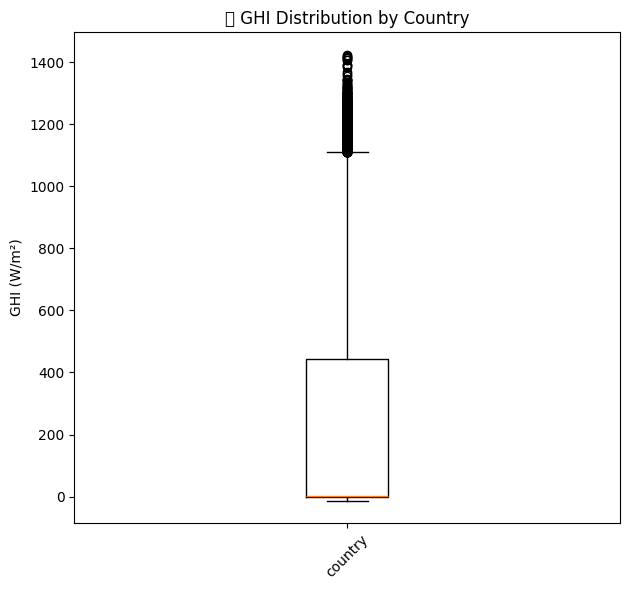

In [7]:
# 1. GHI Comparison Boxplot
plt.figure(figsize=(12,6))
ghi_data = []
country_labels = []
for country, df in country_data.items():
    if 'GHI' in df.columns:
        ghi_data.append(df['GHI'].dropna())
        country_labels.append(country) 
        
if ghi_data:
    plt.subplot(1, 2, 1)
    plt.boxplot(ghi_data, labels=country_labels)
    plt.title('📦 GHI Distribution by Country')
    plt.ylabel('GHI (W/m²)')
    plt.xticks(rotation=45)

    # 2. Summary Statistics Table
print("\n📈 Summary Statistics - GHI (W/m²):")
summary_data = []
for country, df in country_data.items():
    if 'GHI' in df.columns:
        summary_data.append({
            'Country': country,
            'Mean GHI': df['GHI'].mean(),
            'Median GHI': df['GHI'].median(), 
            'Std GHI': df['GHI'].std(),
            'Max GHI': df['GHI'].max()
        })

summary_df = pd.DataFrame(summary_data)
print(summary_df)
plt.tight_layout()
plt.show()

C:\Users\ourbarn\AppData\Local\Temp\ipykernel_8548\1383256529.py:22: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\ourbarn\Desktop\solar-challenge-week0\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


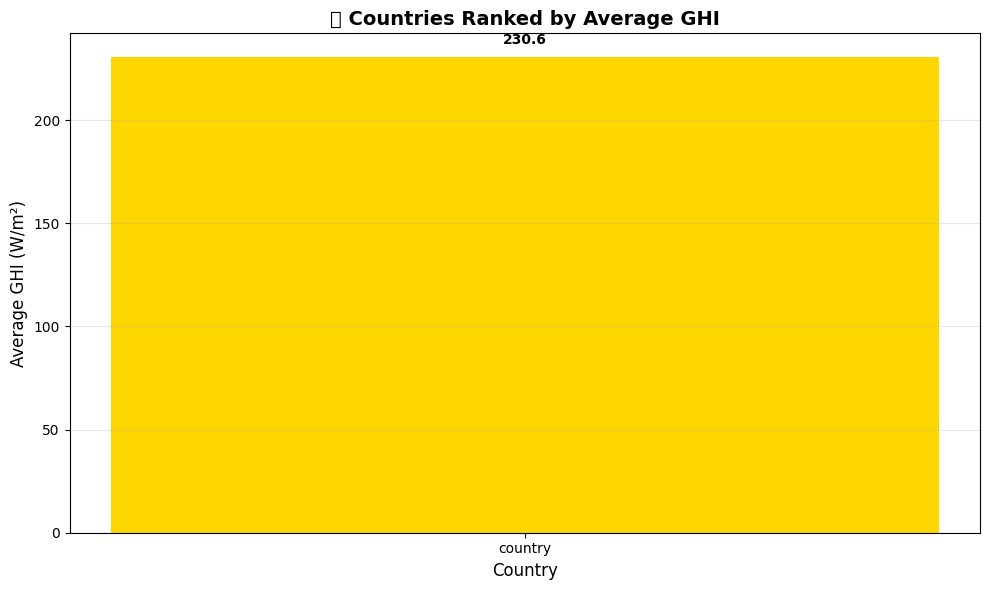


🥇 Final Ranking by Solar Potential:
🥇 #1: country - 230.6 W/m²


In [11]:
# 5. Ranking Visualization - FIXED
plt.figure(figsize=(10, 6))

# Create the ranking data properly
ranking_data = summary_df[['Country', 'Mean GHI']].sort_values('Mean GHI', ascending=False)

# Create the bar chart
bars = plt.bar(ranking_data['Country'], ranking_data['Mean GHI'], 
               color=['gold', 'orange', 'lightcoral'])

plt.title('🏆 Countries Ranked by Average GHI', fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)', fontsize=12)
plt.xlabel('Country', fontsize=12)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Print the ranking clearly
print("\n🥇 Final Ranking by Solar Potential:")
for i, (_, row) in enumerate(ranking_data.iterrows(), 1):
    medal = {1: "🥇", 2: "🥈", 3: "🥉"}.get(i, "•")
    print(f"{medal} #{i}: {row['Country']} - {row['Mean GHI']:.1f} W/m²")